# Module 3. Data wrangling
# Joins

## Lecture objectives

1. Illustrate the parsing of different datasets
2. Introduce the different types of joins: left, right, inner, outer, 1:1, 1:many, etc.
3. Demonstrate how to join different datasets in `pandas` using indices

Data wrangling, or data munging, is the process of cleaning, transforming, and aggregating data to make it usable for analysis. We've already done some of this implicitly, for example through dealing with missing data in Craigslist posts, or converting from strings to numeric formats.

Data wrangling is perhaps the least glamorous part of data science, but the most time consuming. Don't be surprised if this takes up 80% of your time. 

## Joins

Before you start to join two (or more) datasets together, think about what end result you want. For example:
* Do you want to keep all the observations from dataset *A*, even if they don't match to anything in dataset *B*? This is a "left join."
* Do you want to keep all the observations, even if they are only in one dataset? This is an "outer join."
* Do you only want to keep the observations that are in both datasets? This is an "inner join."
* Do you want to allow more than one match? This is a "many-to-one," "one-to-many," or "many-to-many" join (not pictured.)

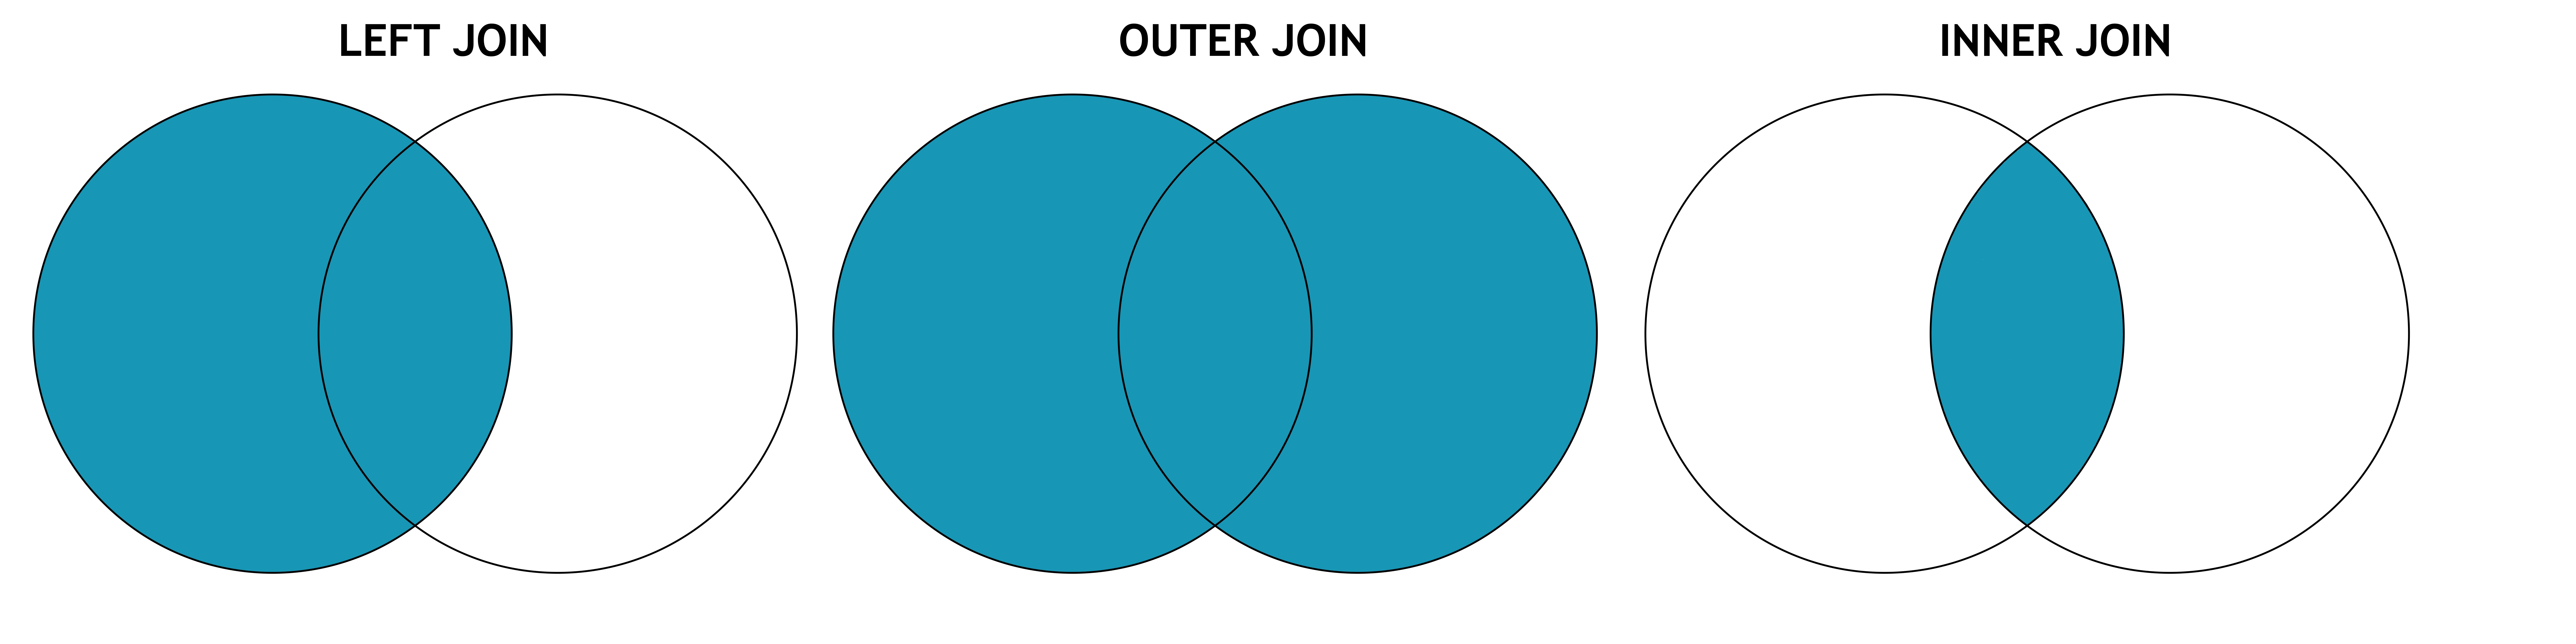

Sometimes, a data provider provides multiple tables, but is explicit about how they are joined to each other. A good example is the [California transportation injuries dataset, SWITRS](https://tims.berkeley.edu/help/SWITRS.php). Here, you can see that the `COLLISION` dataset joins to the `PARTY` dataset using the `CASE ID` column. Also note that there is a `1:N` match, meaning that each collision may have more than one party (for example, a crash involving a car and a bicyclist).

I downloaded one month of data (to save you from registering) from Ventura County.

In [ ]:
import pandas as pd
collisionDf = pd.read_csv('../data/Collisions.csv')
partyDf = pd.read_csv('../data/Parties.csv')
victimDf = pd.read_csv('../data/Victims.csv')

The easiest way to join two data frames in `pandas` is through setting the index. We've used indexes implicitly so far, but now let's look at them in more detail.

All these dataframes have an integer index (`pandas` created them when we loaded in each .csv file). That means that `.iloc`, which returns based on row number, and `.loc`, which returns based on the index, produce identical results.

In [ ]:
print (collisionDf.index)
print (collisionDf.index.values)

In [ ]:
print (collisionDf.loc[0])

In [ ]:
print (collisionDf.iloc[0])

We can set the index to any column we want in the dataframe, or even multiple columns. For example, let's set the index to `CASE_ID`. The `inplace` keyword argument means that we modify the existing dataframe rather than returning a copy of it.

In [ ]:
collisionDf.set_index('CASE_ID', inplace=True)
partyDf.set_index('CASE_ID', inplace=True)
print(collisionDf.head())

In [ ]:
# if we want to check what the index is, you can try
print(collisionDf.index)

Since we've changed the index, `.loc` and `.iloc` no longer return the same thing. Indeed, this doesn't work because index `0` no longer exists. Notice we get a `KeyError`, meaning that the index key is not found.

In [ ]:
print (collisionDf.loc[0])

But `.iloc` still works.

In [ ]:
print (collisionDf.iloc[0])

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> How would you access this row using <strong>.loc</strong>? Hint: look at the case number.
</div>

Note that the index appears at the bottom of the previous output (it's the `Name` of this row). So we can plug that into `.loc`.

In [ ]:
print (collisionDf.loc[8167180])

Now let's do the join. There are several functions that do this in `pandas`. I find `.join()` the easiest in most situations.

Remember that the dataset documentation told us that we should join on `CASENO`, which is now our index. You can join on any column (not just the index), but using the index is usually easier and faster.

In [ ]:
joinedDf = collisionDf.join(partyDf)

You probably got an error. The error message is quite helpful - it tells us that the `ACCIDENT_YEAR` column is present in both datasets, so `pandas` doesn't know which one to keep.

We could drop one of them.

In [ ]:
joinedDf = collisionDf.join(partyDf.drop(columns='ACCIDENT_YEAR'))
print(joinedDf.head())

Or we could keep both `ACCIDENT_YEAR` columns, and distinguish one of them with a suffix.

For example, the `rsuffix` argument will add this suffix to any duplicate columns from the right dataframe (in this case, `partyDf`).

In [ ]:
joinedDf = collisionDf.join(partyDf, rsuffix='_from_party')
joinedDf.columns

When joining, it's always good practice to look at the number of rows (i.e., the dataframe length) before and after joining. This is particularly important when you want a dataset of unique observations.

For example, here, we see that our new joined dataframe is longer than our original collision dataframe.

In [ ]:
print('Collision dataframe has {} rows'.format(len(collisionDf)))
print('Party dataframe has {} rows'.format(len(partyDf)))
print('Joined dataframe has {} rows'.format(len(joinedDf)))

So we did a left join (we keep all observations in the left dataframe, which is `collisionDf`. [A left join is the pandas default.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html) We also did a one-to-many join: one collision is joined to many parties, but each party is only joined to a single collision (identified with `CASENO`).

The `is_unique` attribute can be helpful in troubleshooting joins. This line of code tells us that our original collisions dataframe had a unique index (`CASENO`).

In [ ]:
collisionDf.index.is_unique

But that's not true for our joined dataframe.

In [ ]:
joinedDf.index.is_unique

We can see why if we look at a single case. For example, `8167180`.

(Note that the output looks a bit different - it's transposed – if we retrieve a single row with `.loc[8167180]`. Using a range helps fix this.

In [ ]:
collisionDf.loc[8167180]

In [ ]:
# the same data, just easier to see
collisionDf.loc[8167180:8167180]

In [ ]:
partyDf.loc[8167180]

In [ ]:
joinedDf.loc[8167180]

We get two rows. The columns that are drawn from `collisionDf` are identical. Those from `partyDf` are not.

So what was the point of that? Well, now we can do analyses that require data from both the collision and the party datasets. That's the topic of the next lecture.

<div class="alert alert-block alert-info">
<h3>Key Takeaways</h3>
<ul>
  <li>Data wrangling needs trial and error.</li>
  <li>Check your dataframe index!</li>
  <li>Always inspect your output, especially the number of rows. If you have fewer rows than when you started with, maybe you did an inner join? If you have more, maybe you did a 1:many join?</li>
</ul>
</div>